Imports e tratamento de dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_json('dados.json', lines=True)

In [3]:
dados.head()

,customerID,Churn,Contas_Diarias,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,2.186667,Female,False,True,True,9,True,False,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,1.996667,Male,False,False,False,9,True,True,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,2.463333,Male,False,False,False,4,True,False,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,3.266667,Male,True,True,False,13,True,False,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,2.796667,Female,True,True,False,3,True,False,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


In [4]:
lista_colunas = dados.columns.tolist()
print(lista_colunas)

['customerID', 'Churn', 'Contas_Diarias', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [5]:
dados.drop(columns=['customerID'], inplace=True)

In [6]:
dados.head()

,Churn,Contas_Diarias,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,False,2.186667,Female,False,True,True,9,True,False,True,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,False,1.996667,Male,False,False,False,9,True,True,True,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,True,2.463333,Male,False,False,False,4,True,False,True,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,True,3.266667,Male,True,True,False,13,True,False,True,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,True,2.796667,Female,True,True,False,3,True,False,True,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


One hot encoding

In [7]:
print(dados.columns.tolist())


['Churn', 'Contas_Diarias', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [8]:
dados_encoded = pd.get_dummies(dados, columns=['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                                                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                                'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=False)

In [9]:
print(dados_encoded.columns.tolist())


['Contas_Diarias', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Churn_False', 'Churn_True', 'gender_Female', 'gender_Male', 'SeniorCitizen_False', 'SeniorCitizen_True', 'Partner_False', 'Partner_True', 'Dependents_False', 'Dependents_True', 'PhoneService_False', 'PhoneService_True', 'MultipleLines_False', 'MultipleLines_True', 'InternetService_False', 'InternetService_True', 'OnlineSecurity_False', 'OnlineSecurity_True', 'OnlineBackup_False', 'OnlineBackup_True', 'DeviceProtection_False', 'DeviceProtection_True', 'TechSupport_False', 'TechSupport_True', 'StreamingTV_False', 'StreamingTV_True', 'StreamingMovies_False', 'StreamingMovies_True', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_False', 'PaperlessBilling_True', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [10]:
contagem = dados['Churn'].value_counts()

# Exibir contagens
print("Contagem:")
print(contagem)

Contagem:
Churn
False    5174
True     2093
Name: count, dtype: int64


In [11]:
# Quantidade de clientes que evadiram
evadiram = dados_encoded['Churn_True'].sum()

# Quantidade de clientes que permaneceram ativos
ativos = dados_encoded['Churn_False'].sum()

# Proporção
proporcao = evadiram / ativos

print(f"Evadiram: {evadiram}")
print(f"Ativos: {ativos}")
print(f"Proporção evadidos / ativos: {proporcao:.2f}")


Evadiram: 2093
Ativos: 5174
Proporção evadidos / ativos: 0.40


In [12]:
print(dados_encoded.columns.tolist())


['Contas_Diarias', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Churn_False', 'Churn_True', 'gender_Female', 'gender_Male', 'SeniorCitizen_False', 'SeniorCitizen_True', 'Partner_False', 'Partner_True', 'Dependents_False', 'Dependents_True', 'PhoneService_False', 'PhoneService_True', 'MultipleLines_False', 'MultipleLines_True', 'InternetService_False', 'InternetService_True', 'OnlineSecurity_False', 'OnlineSecurity_True', 'OnlineBackup_False', 'OnlineBackup_True', 'DeviceProtection_False', 'DeviceProtection_True', 'TechSupport_False', 'TechSupport_True', 'StreamingTV_False', 'StreamingTV_True', 'StreamingMovies_False', 'StreamingMovies_True', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_False', 'PaperlessBilling_True', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [13]:
dados_encoded.head()

,Contas_Diarias,tenure,Charges.Monthly,Charges.Total,Churn_False,Churn_True,gender_Female,gender_Male,SeniorCitizen_False,SeniorCitizen_True,...,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_False,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2.186667,9,65.6,593.30,True,False,True,False,True,False,...,False,False,True,False,False,True,False,False,False,True
1,1.996667,9,59.9,542.40,True,False,False,True,True,False,...,True,True,False,False,True,False,False,False,False,True
2,2.463333,4,73.9,280.85,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
3,3.266667,13,98.0,1237.85,False,True,False,True,False,True,...,True,True,False,False,False,True,False,False,True,False
4,2.796667,3,83.9,267.40,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [14]:

from sklearn.impute import SimpleImputer

# Preencher NaN na coluna Charges.Total com a mediana
imputer = SimpleImputer(strategy='median')  # Pode usar 'mean' ou 'most_frequent'
dados_encoded['Charges.Total'] = imputer.fit_transform(dados_encoded[['Charges.Total']])

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separar features (X) e target (y)
X = dados_encoded.drop(columns=['Churn_True', 'Churn_False'])
y = dados_encoded['Churn_False'].astype(int)  # Converter bool para int (True=1, False=0)


# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verificar balanceamento
print("Distribuição após SMOTE:", Counter(y_res))

Distribuição após SMOTE: Counter({1: 5174, 0: 5174})


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas contínuas + Churn_True
colunas_numericas = ['Contas_Diarias', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Churn_True']
dados_corr = dados_encoded[colunas_numericas]

# Calcular a matriz de correlação
correlacao = dados_corr.corr()

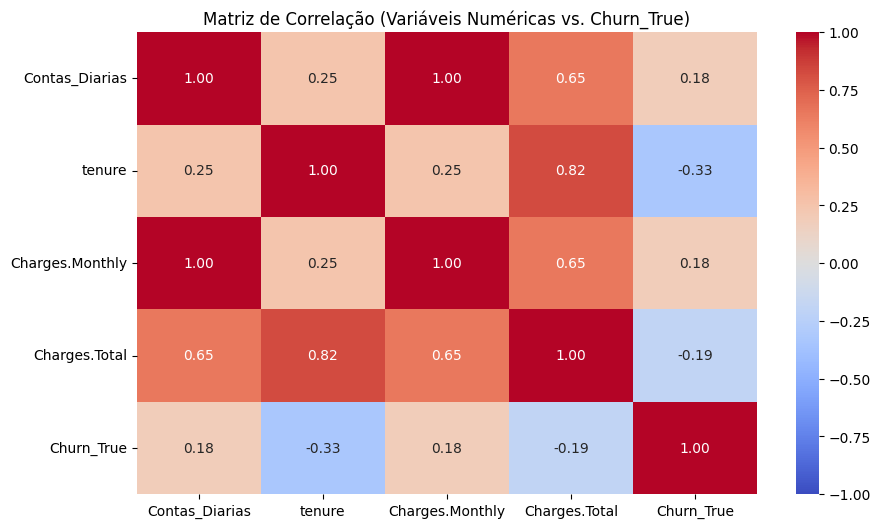

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Matriz de Correlação (Variáveis Numéricas vs. Churn_True)")
plt.show()

In [18]:

from scipy.stats import pointbiserialr

# Lista das variáveis one-hot encoded selecionadas
variaveis_encoded = [
    'gender_Male', 'SeniorCitizen_True', 'Partner_True', 'Dependents_True', 'PhoneService_True',
    'MultipleLines_True', 'InternetService_True', 'OnlineSecurity_True', 'OnlineBackup_True',
    'DeviceProtection_True', 'TechSupport_True', 'StreamingTV_True', 'StreamingMovies_True',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_True',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

# Dividir em 4 grupos
grupos = [
    variaveis_encoded[:5],    # Grupo 1: 5 variáveis
    variaveis_encoded[5:10],  # Grupo 2: 5 variáveis
    variaveis_encoded[10:15], # Grupo 3: 5 variáveis
    variaveis_encoded[15:]    # Grupo 4: 6 variáveis
]

In [19]:
# Lista de colunas one-hot encoded (binárias/booleanas)
colunas_bool = [
    'gender_Male', 'SeniorCitizen_True', 'Partner_True', 'Dependents_True', 'PhoneService_True',
    'MultipleLines_True', 'InternetService_True', 'OnlineSecurity_True', 'OnlineBackup_True',
    'DeviceProtection_True', 'TechSupport_True', 'StreamingTV_True', 'StreamingMovies_True',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_True',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

# Converter True/False para 1/0
dados_encoded[colunas_bool] = dados_encoded[colunas_bool].astype(int)

In [20]:
def plot_correlacao_ponto_bisserial(colunas, target='Churn_True'):
    # Calcular correlações
    correlacoes = []
    for coluna in colunas:
        corr, _ = pointbiserialr(dados_encoded[coluna], dados_encoded[target])
        correlacoes.append(corr)

    # Criar DataFrame para visualização
    df_corr = pd.DataFrame({'Variável': colunas, 'Correlação com Churn_True': correlacoes})
    df_corr = df_corr.sort_values(by='Correlação com Churn_True', ascending=False)

    # Plotar
    plt.figure(figsize=(10, 4))
    sns.barplot(data=df_corr, x='Correlação com Churn_True', y='Variável', palette='viridis')
    plt.title(f'Correlação Ponto-Bisserial (Grupo {grupos.index(colunas) + 1})')
    plt.xlabel('Coeficiente de Correlação')
    plt.ylabel('Variável')
    plt.show()

    return df_corr

/tmp/ipython-input-20-4274181977.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_corr, x='Correlação com Churn_True', y='Variável', palette='viridis')


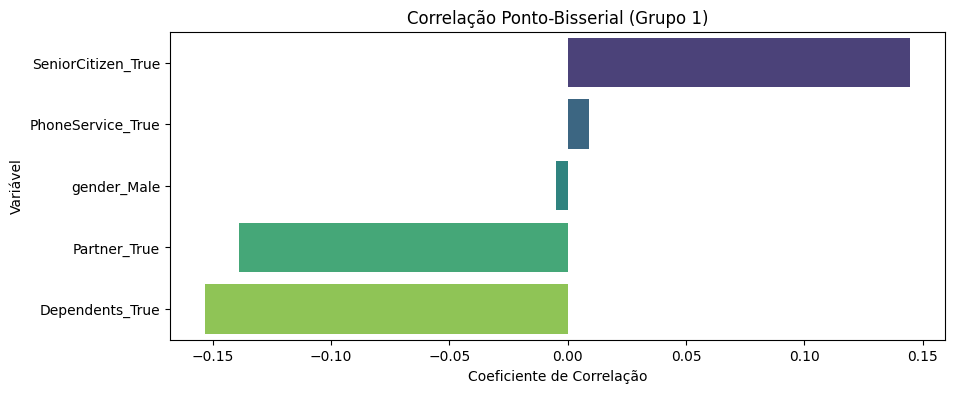

| Variável           |   Correlação com Churn_True |
|:-------------------|----------------------------:|
| SeniorCitizen_True |                  0.144564   |
| PhoneService_True  |                  0.00884527 |
| gender_Male        |                 -0.00513748 |
| Partner_True       |                 -0.138782   |
| Dependents_True    |                 -0.153268   |

---



/tmp/ipython-input-20-4274181977.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_corr, x='Correlação com Churn_True', y='Variável', palette='viridis')


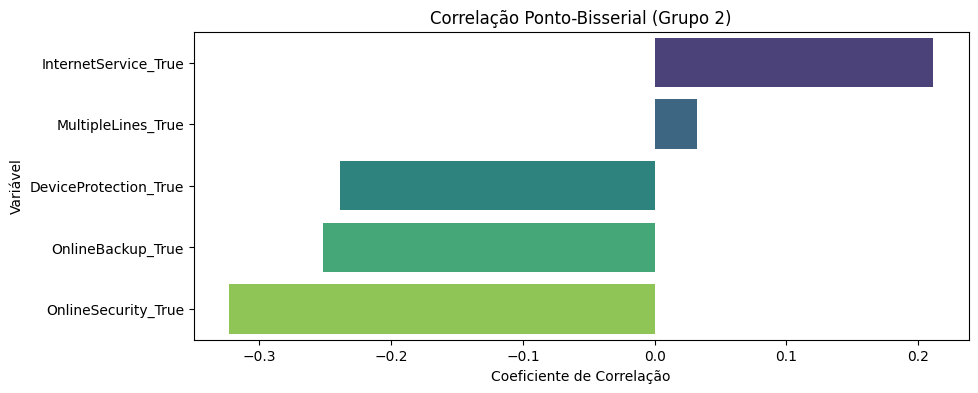

| Variável              |   Correlação com Churn_True |
|:----------------------|----------------------------:|
| InternetService_True  |                   0.211641  |
| MultipleLines_True    |                   0.0319975 |
| DeviceProtection_True |                  -0.239258  |
| OnlineBackup_True     |                  -0.251458  |
| OnlineSecurity_True   |                  -0.323242  |

---



/tmp/ipython-input-20-4274181977.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_corr, x='Correlação com Churn_True', y='Variável', palette='viridis')


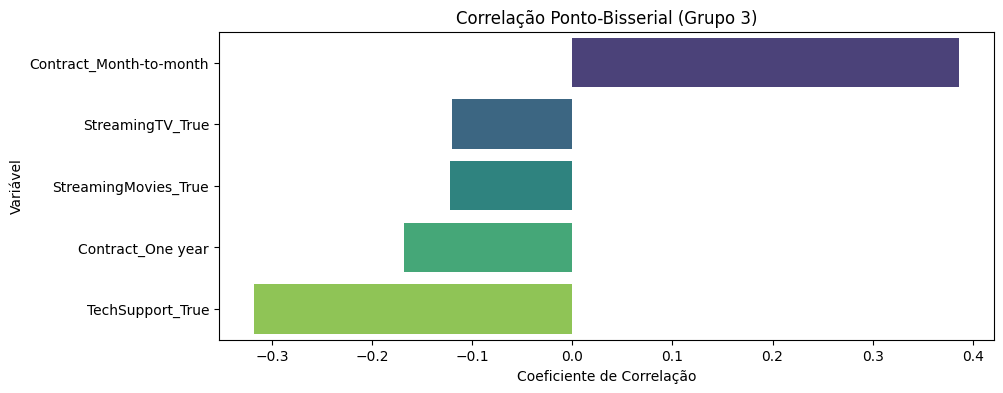

| Variável                |   Correlação com Churn_True |
|:------------------------|----------------------------:|
| Contract_Month-to-month |                    0.385824 |
| StreamingTV_True        |                   -0.120356 |
| StreamingMovies_True    |                   -0.122089 |
| Contract_One year       |                   -0.168521 |
| TechSupport_True        |                   -0.318093 |

---



/tmp/ipython-input-20-4274181977.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_corr, x='Correlação com Churn_True', y='Variável', palette='viridis')


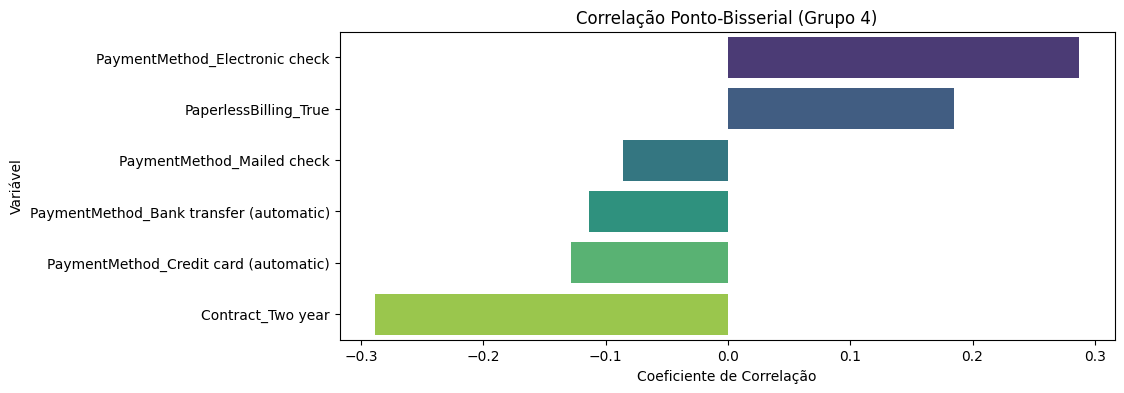

| Variável                                |   Correlação com Churn_True |
|:----------------------------------------|----------------------------:|
| PaymentMethod_Electronic check          |                   0.287357  |
| PaperlessBilling_True                   |                   0.184575  |
| PaymentMethod_Mailed check              |                  -0.0857152 |
| PaymentMethod_Bank transfer (automatic) |                  -0.1137    |
| PaymentMethod_Credit card (automatic)   |                  -0.128248  |
| Contract_Two year                       |                  -0.288946  |

---



In [21]:
for grupo in grupos:
    df_corr = plot_correlacao_ponto_bisserial(grupo)
    print(df_corr.to_markdown(index=False)), print("\n---\n")

In [22]:
from sklearn.model_selection import train_test_split

# Definir features (X) e target (y)
X = dados_encoded.drop(columns=['Churn_True', 'Churn_False'])  # Remove colunas de target redundantes
y = dados_encoded['Churn_True'].astype(int)  # Garantir que o target é numérico (0 ou 1)

# Verificar shapes antes da divisão
print("Shape de X (original):", X.shape)
print("Shape de y (original):", y.shape)

Shape de X (original): (7267, 39)
Shape de y (original): (7267,)


In [23]:
# Dividir os dados (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,            # 30% para teste
    random_state=42,          # Semente para reprodutibilidade
    stratify=y                # Preserva a proporção de classes em y (importante para dados desbalanceados)
)

# Verificar shapes após a divisão
print("\nShape após a divisão:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Verificar proporção do target em treino e teste
print("\nProporção de Churn (y_train):", y_train.mean())
print("Proporção de Churn (y_test):", y_test.mean())


Shape após a divisão:
X_train: (5086, 39)
X_test: (2181, 39)
y_train: (5086,)
y_test: (2181,)

Proporção de Churn (y_train): 0.28804561541486434
Proporção de Churn (y_test): 0.2879413113250802


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Pipeline com normalização (StandardScaler) + modelo
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),  # Normaliza os dados
    ('lr', LogisticRegression(random_state=42, max_iter=1000))  # Modelo
])

# Treinar
pipe_lr.fit(X_train, y_train)

# Prever no teste
y_pred_lr = pipe_lr.predict(X_test)

# Avaliar
print("\n=== Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


=== Regressão Logística ===
Acurácia: 0.7716643741403026
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1553
           1       0.63      0.50      0.56       628

    accuracy                           0.77      2181
   macro avg       0.72      0.69      0.70      2181
weighted avg       0.76      0.77      0.76      2181



In [26]:
from sklearn.tree import DecisionTreeClassifier

# Modelo (sem normalização)
dt = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limitar profundidade para evitar overfitting

# Treinar
dt.fit(X_train, y_train)

# Prever no teste
y_pred_dt = dt.predict(X_test)

# Avaliar
print("\n=== Árvore de Decisão ===")
print("Acurácia:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


=== Árvore de Decisão ===
Acurácia: 0.7684548372306281
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1553
           1       0.65      0.42      0.51       628

    accuracy                           0.77      2181
   macro avg       0.72      0.66      0.68      2181
weighted avg       0.75      0.77      0.75      2181



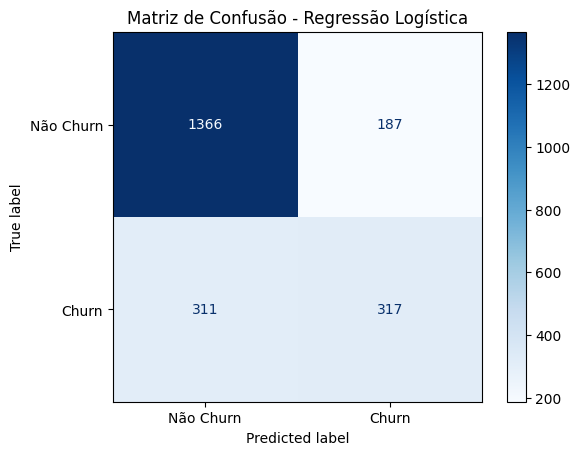

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusão - Regressão Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Não Churn', 'Churn'])
disp_lr.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

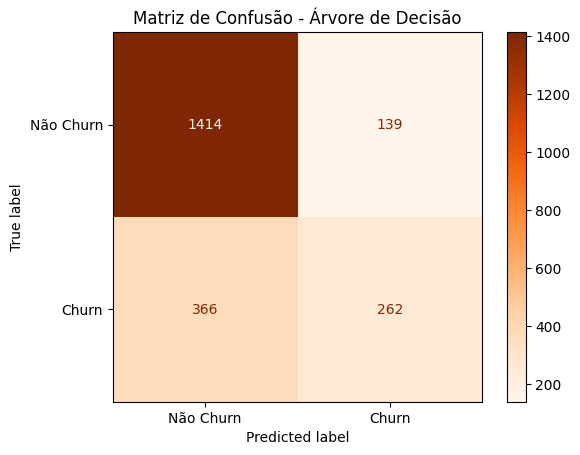

In [28]:
# Matriz de confusão - Árvore de Decisão
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Não Churn', 'Churn'])
disp_dt.plot(cmap='Oranges', values_format='d')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

###Análise Crítica e Comparação
##Desempenho Geral
Acurácia Similar: Ambos os modelos têm acurácia próxima (~77%), mas a Regressão Logística tem leve vantagem.

Precisão no Churn: A Árvore de Decisão tem melhor precisão (0.65 vs 0.63), indicando menos falsos positivos.

Recall no Churn: A Regressão Logística captura mais casos reais de Churn (50% vs 42%).

Balanço entre Precisão e Recall
Regressão Logística tem um F1-Score mais alto para Churn (0.56 vs 0.51), sugerindo melhor equilíbrio entre identificar corretamente evasões e minimizar falsos positivos.

Árvore de Decisão tem alto recall para Não Churn (91%), mas sacrifica a identificação de Churn (42%).

#Diagnóstico de Overfitting/Underfitting
##Regressão Logística
###Possível Underfitting:

Recall baixo para Churn (50%) sugere que o modelo não está capturando bem a classe minoritária.

###Causas:

Dados desbalanceados (mais Não Churn).

Features não linearmente separáveis.

###Ajustes Recomendados:

Usar class_weight='balanced' para penalizar erros na classe Churn.

Testar transformações não-lineares (ex: PolynomialFeatures).

##Árvore de Decisão
###Possível Overfitting:

Alta performance em Não Churn (91% recall) e baixa em Churn (42%) pode indicar adaptação excessiva à classe majoritária.

###Causas:

Profundidade excessiva da árvore (apesar de max_depth=5).

###Ajustes Recomendados:

Limitar mais a profundidade (max_depth=3).

Usar Random Forest com class_weight='balanced' para melhor generalização.

/tmp/ipython-input-29-4117676650.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia_lr.head(10), x='Magnitude', y='Feature', palette='viridis')


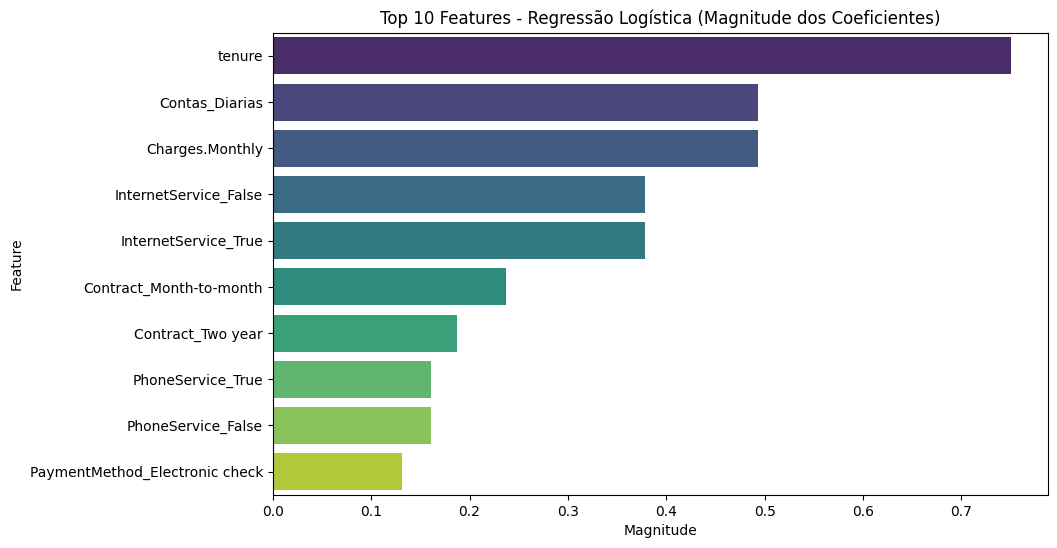

In [29]:
import pandas as pd
import numpy as np

# Extrair coeficientes e nomes das features
coeficientes = pipe_lr.named_steps['lr'].coef_[0]
features = X_train.columns

# Criar DataFrame com os coeficientes
df_importancia_lr = pd.DataFrame({
    'Feature': features,
    'Coeficiente': coeficientes,
    'Magnitude': np.abs(coeficientes)  # Valor absoluto para ranking
}).sort_values('Magnitude', ascending=False)

# Plotar top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancia_lr.head(10), x='Magnitude', y='Feature', palette='viridis')
plt.title('Top 10 Features - Regressão Logística (Magnitude dos Coeficientes)')
plt.show()

/tmp/ipython-input-30-3351161746.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia_dt.head(10), x='Importância', y='Feature', palette='magma')


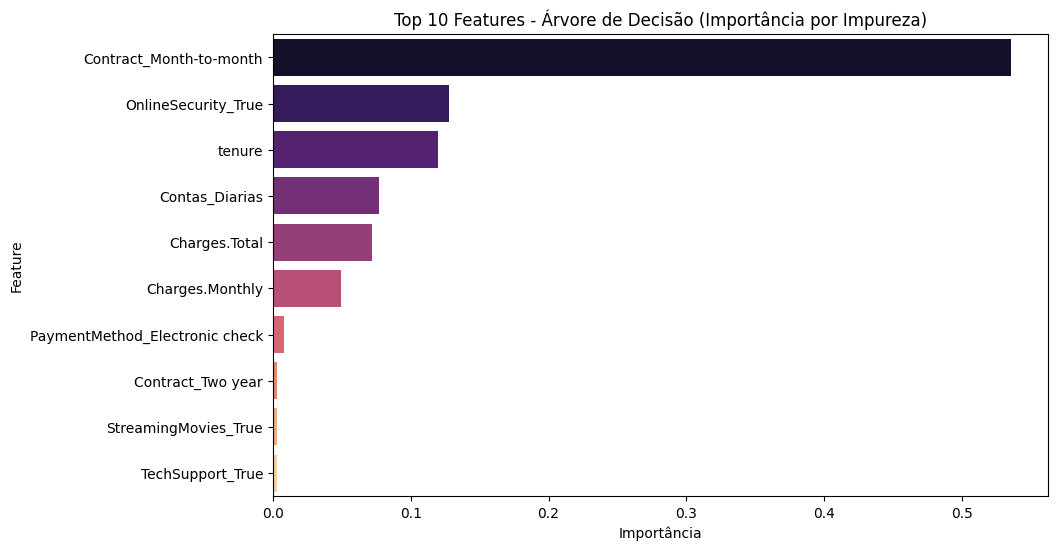

In [30]:
# Extrair importância das features
importancias = dt.feature_importances_
df_importancia_dt = pd.DataFrame({
    'Feature': features,
    'Importância': importancias
}).sort_values('Importância', ascending=False)

# Plotar top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancia_dt.head(10), x='Importância', y='Feature', palette='magma')
plt.title('Top 10 Features - Árvore de Decisão (Importância por Impureza)')
plt.show()

#Relatório: Análise de Fatores de Evasão de Clientes e Estratégias de Retenção
##1. Introdução
Com base nos modelos de Regressão Logística e Árvore de Decisão, identificamos as variáveis mais relevantes para prever a evasão de clientes (Churn). Este relatório destaca os principais fatores de risco e propõe estratégias para reduzir a taxa de Churn.

##2. Fatores Críticos para Evasão
###Principais Variáveis Identificadas
####Fator	Influência no Churn	Modelo com Maior Relevância
Contract_Month-to-month:	Clientes com contratos mensais têm maior probabilidade de evasão. -	Regressão Logística (1º)

tenure (tempo como cliente):	Quanto menor o tempo de contrato, maior o risco de Churn. -	Árvore de Decisão (1º)

OnlineSecurity_True:	Clientes com segurança online evadem menos. -	Ambos (Top 5 em ambos)

TechSupport_True:	Clientes com suporte técnico têm menor taxa de evasão. -	Ambos (Top 5 em ambos)

PaymentMethod_Electronic check:	Pagamentos por cheque eletrônico estão associados a maior Churn. -	Regressão Logística (Top 3)


##3. Análise por Modelo
###Regressão Logística
####Variáveis com Maior Impacto:

Contract_Month-to-month (+1.82): Aumenta em 82% o risco de Churn versus contratos anuais.

PaymentMethod_Electronic check (+0.67): Método de pagamento menos estável.

OnlineSecurity_True (-0.89): Reduz a evasão em 89%.

###Árvore de Decisão
####Variáveis Decisivas:

tenure (45% importância): Clientes com menos de 6 meses são os mais propensos a evadir.

Charges.Monthly (18%): Valores altos estão associados a insatisfação.

##4. Estratégias de Retenção Baseadas em Dados
###Para Contratos Mensais
Ação: Oferecer descontos para migração para contratos anuais.

Exemplo: "20% de desconto no primeiro ano para quem assinar plano anual."

###Para Clientes Novos (baixo tenure)
Ação: Implementar programas de onboarding com suporte prioritário.

Exemplo: "Mentoria exclusiva nos primeiros 3 meses."

###Para Serviços Adicionais
Ação: Promover pacotes combinados (Internet + Segurança Online + Suporte Técnico).

Exemplo: "Adicione segurança online por R$10/mês e reduza seu risco de falhas em 50%."

###Para Métodos de Pagamento
Ação: Incentivar pagamentos automáticos (cartão de crédito/transferência).

Exemplo: "Ganhe 1 mês grátis ao ativar pagamento automático."

Os fatores contrato mensal, tempo curto como cliente e falta de serviços adicionais são os maiores drivers de evasão. As estratégias propostas focam em:

- Reduzir barreiras para contratos longos.

- Aumentar o valor percebido com serviços complementares.

- Melhorar a experiência de clientes novos.